In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Some of the questions answered by the following analysis will be :

* In what neighbourhoo/neighbourhood group do we find the biggest amount of listings ?
* What type of room type is the most popular?
* How are skewed are the input variables?
* What are the factors that influence most the air b and b price based on the dataset information?


## Import the data, check missing values , drop not necessary columns

In [2]:
df=pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#### Check missing values

In [3]:
#df.describe()
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [4]:
df[df.isnull().any(axis=1)].groupby('number_of_reviews').count()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,last_review,reviews_per_month,calculated_host_listings_count,availability_365
number_of_reviews,,,,,,,,,,,,,,,
0,10052,10042,10052,10047,10052,10052,10052,10052,10052,10052,10052,0,0,10052,10052
1,5,3,5,2,5,5,5,5,5,5,5,5,5,5,5
2,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1
3,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1
5,3,1,3,2,3,3,3,3,3,3,3,3,3,3,3
6,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1
28,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1
34,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1
37,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1


Anytime there is a missing value for last review there is a missing value for review per month as well ! Those are the listings that have not been booked yet since their total number of reviews is 0, so the data is accurate for all these rows and should not be dropped. I will fill in the last review as 0 and reviews per month as 0

In [5]:
df['last_review'].fillna(0, inplace=True)

In [6]:
df['reviews_per_month'].fillna(0, inplace=True)

In [7]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
df['last_review'] = df['last_review'].apply(lambda x : x== 0 if x == 0  else 0)

In [9]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,True,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,0,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0,0.10,1,0


In [10]:
df["last_review"] = df["last_review"].astype(int)

In [11]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,0,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,0,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,0,1.33,4,188


Anytime there is a missing value for last review there is a missing value for review per month as well ! Those are the listings that have not been booked yet!

There are some missing hosts or place's names at random (21 out of 48k rows) , and they do not seem to affect the quality of the dataset. They might have all the other fields populated, so the rows should be still kept.

First, I will drop columns that will not be a predictor of the price like the host name or latitude/longitude. 
We already have neighborhood and borough info so latitude and longitude would not be important

In [12]:
df1 = df.copy()

In [13]:
df.drop(['name', 'host_name', 'latitude', 'longitude'], axis = 1, inplace=True) 

In [14]:
df.drop_duplicates(inplace=True)

## Visualizations and plots

In [15]:
df.head(3)

,id,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,Private room,149,1,9,0,0.21,6,365
1,2595,2845,Manhattan,Midtown,Entire home/apt,225,1,45,0,0.38,2,355
2,3647,4632,Manhattan,Harlem,Private room,150,3,0,1,0.00,1,365


In [16]:
df.describe()

,id,host_id,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,152.720687,7.029962,23.274466,0.205583,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,240.154170,20.510550,44.550582,0.404131,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,69.000000,1.000000,1.000000,0.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,106.000000,3.000000,5.000000,0.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,175.000000,5.000000,24.000000,0.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,1.000000,58.500000,327.000000,365.000000


#### What is the number of listing per host distribution  ? 

In [17]:
#df[['id','host_id']].groupby('host_id').count()

df2 = df[['host_id','id']].groupby(['host_id'])['id'].size().nlargest(10).reset_index(name='top5')
            
df2.head(10)

,host_id,top5
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,1475015,52


In [18]:
df3 = df[['host_id','id']].groupby('host_id').count().reset_index()
df3.head()

,host_id,id
0,2438,1
1,2571,1
2,2787,6
3,2845,2
4,2868,1


In [19]:
df3.describe()

,host_id,id
count,3.745700e+04,37457.000000
mean,6.144549e+07,1.305363
std,7.511750e+07,2.760747
min,2.438000e+03,1.000000
25%,7.050126e+06,1.000000
50%,2.679050e+07,1.000000
75%,8.817184e+07,1.000000
max,2.743213e+08,327.000000


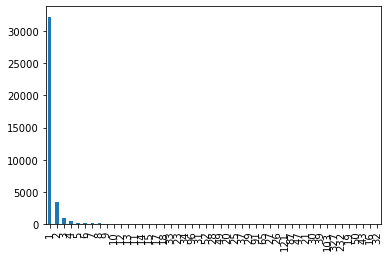

In [20]:
df3['id'].value_counts().plot(kind='bar')
plt.show()

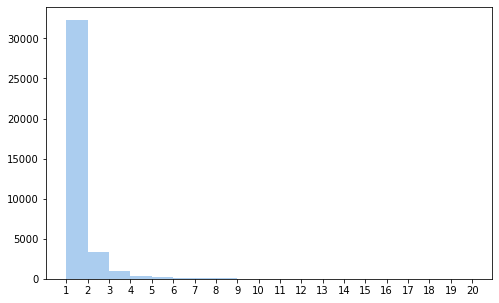

In [21]:
bins = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

plt.figure(figsize=(8,5))

plt.hist(df3.id, bins=bins, color='#abcdef')

plt.xticks(bins)

plt.show()

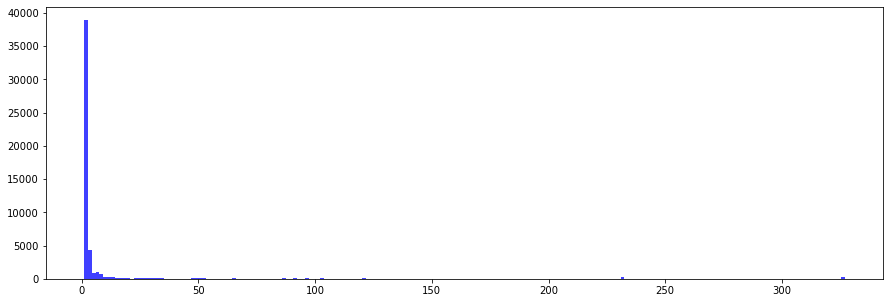

In [22]:
plt.figure(figsize=(15,5))

plt.hist(df['calculated_host_listings_count'], 200, facecolor='b', alpha=0.75)
plt.show()

#### What is the neighborhood with most listings? 

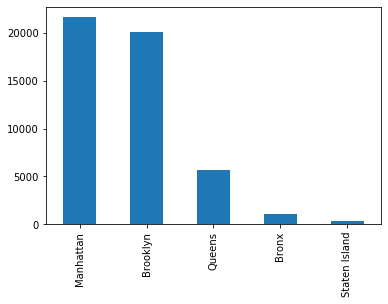

In [23]:
df['neighbourhood_group'].value_counts().plot(kind='bar')
plt.show()

#### What is the borough with most listings? 

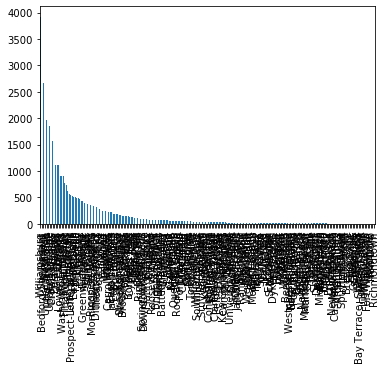

In [24]:
df['neighbourhood'].value_counts().plot(kind='bar')
plt.show()

There are too many values so I will just print out the 20 most listed ones

In [25]:
#df[['id','host_id']].groupby('host_id').count()

df4 = df[['neighbourhood','id']].groupby(['neighbourhood'])['id'].size().nlargest(20).reset_index(name='top5')
            
df4.head(20)

,neighbourhood,top5
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971
5,Hell's Kitchen,1958
6,East Village,1853
7,Upper East Side,1798
8,Crown Heights,1564
9,Midtown,1545


What are the 20 least listed? 

In [26]:
df5 = df[['neighbourhood','id']].groupby(['neighbourhood'])['id'].size().nsmallest(20).reset_index(name='top5')
            
df5.head(20)

,neighbourhood,top5
0,Fort Wadsworth,1
1,New Dorp,1
2,Richmondtown,1
3,Rossville,1
4,Willowbrook,1
5,Woodrow,1
6,"Bay Terrace, Staten Island",2
7,Co-op City,2
8,Howland Hook,2
9,Lighthouse Hill,2


#### How is the room type distribution?

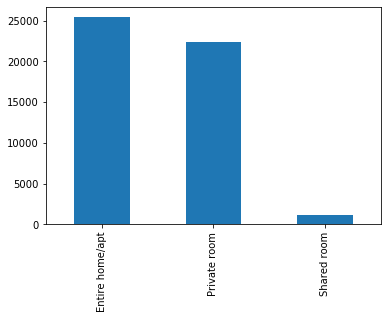

In [27]:
df['room_type'].value_counts().plot(kind='bar')
plt.show()

#### How about the minimum nights? 

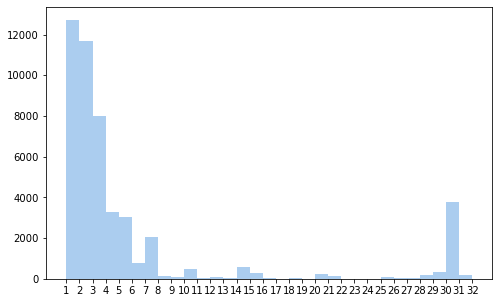

In [28]:
bins = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32]

plt.figure(figsize=(8,5))

plt.hist(df['minimum_nights'], bins=bins, color='#abcdef')

plt.xticks(bins)

plt.show()

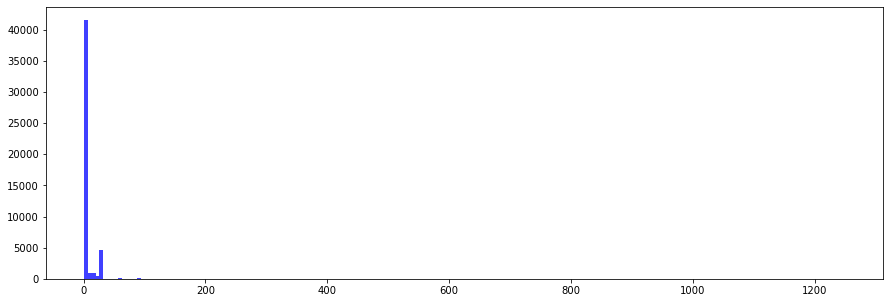

In [29]:
plt.figure(figsize=(15,5))

plt.hist(df['minimum_nights'], 200, facecolor='b', alpha=0.75)
plt.show()

#### Number of reviews ? 

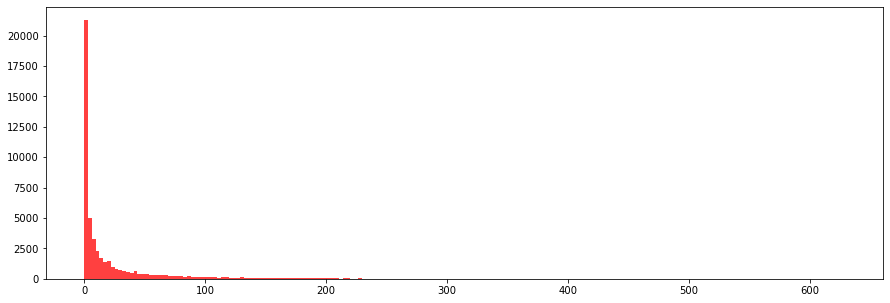

In [30]:
plt.figure(figsize=(15,5))

plt.hist(df['number_of_reviews'], 200, facecolor='r', alpha=0.75)
plt.show()

#### Number of reviews per month ? 

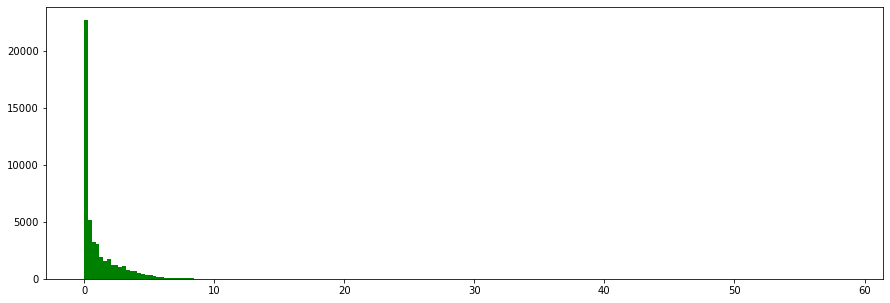

In [31]:
plt.figure(figsize=(15,5))

plt.hist(df['reviews_per_month'], 200, facecolor='g', alpha=1)
plt.show()

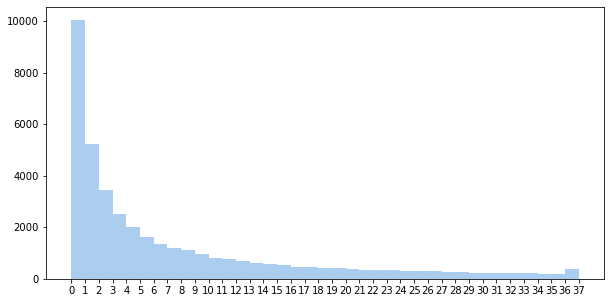

In [32]:
bins = [0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37]

plt.figure(figsize=(10,5))

plt.hist(df['number_of_reviews'], bins=bins, color='#abcdef')

plt.xticks(bins)

plt.show()

#### What is the price distribution? 

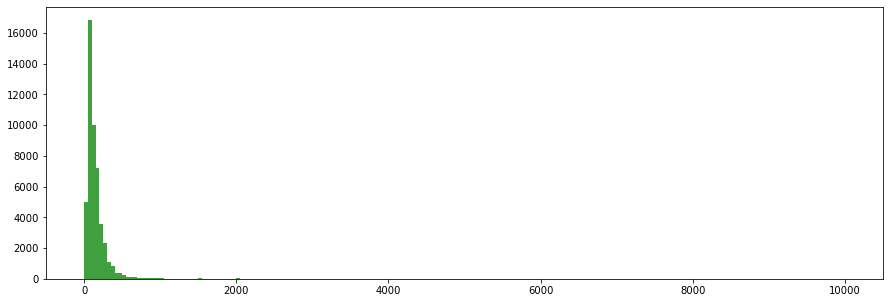

In [33]:
plt.figure(figsize=(15,5))

plt.hist(df['price'], 200, facecolor='g', alpha=0.75)
plt.show()

#### What is the 365 availability? 

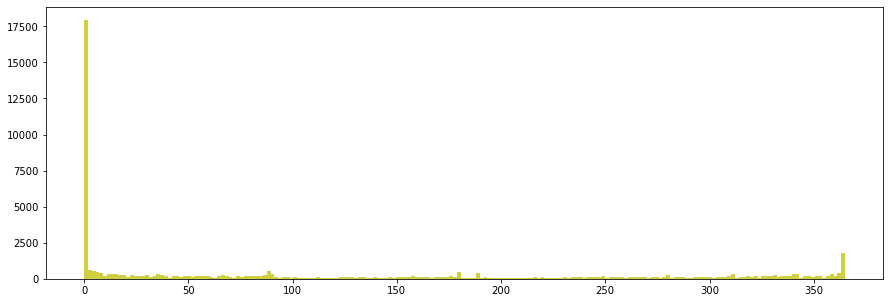

In [34]:
plt.figure(figsize=(15,5))

plt.hist(df['availability_365'], 200, facecolor='y', alpha=0.75)
plt.show()


### Correlation plot

In [35]:
df.drop(['host_id', 'id'], axis = 1, inplace=True) 

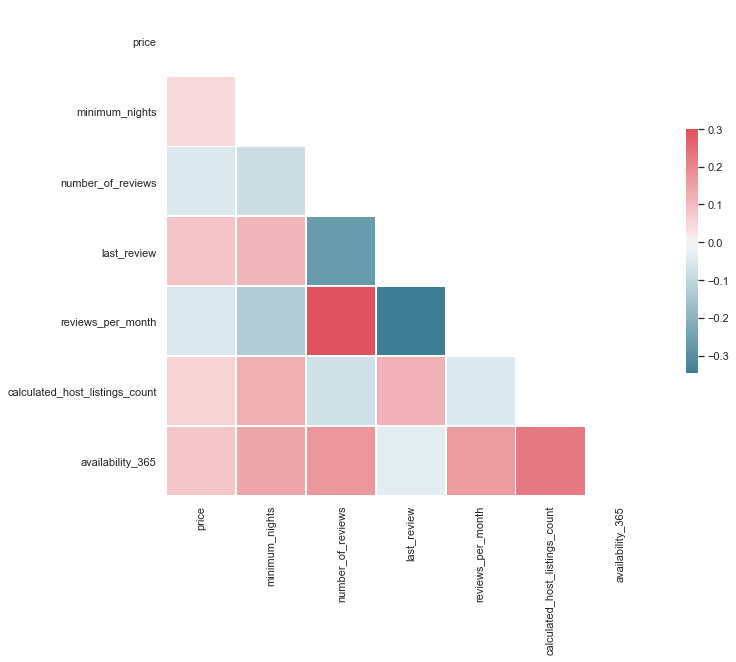

In [36]:
from string import ascii_letters


sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [37]:
#Next steps : price distribution , correlation matrix, other distributions
# what are the key preditiors for price? 
#standard scaler and onehot encoder
#regression model : try random forest, multivariable regression, xgboost 


## EDA to reduce neighbourhoods , correlation on the  reservations, remove ouliers, and use the last review time variables

In [38]:
df11 = df1.iloc[:, 6:8]

In [39]:
df11.head(3)

,latitude,longitude
0,40.64749,-73.97237
1,40.75362,-73.98377
2,40.80902,-73.94190


#### EDA step 1 Assignment of Clusters for each neighbourhood and reduce the buckets

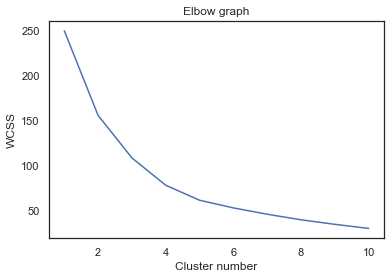

In [40]:
from sklearn.cluster import KMeans
import matplotlib

#grouped_clustering = rome_grouped.drop('Neighborhood', 1)

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(df11)
    wcss.append(kmeans.inertia_)


# In[221]:


plt.plot(range(1,11), wcss)
plt.title('Elbow graph')
plt.xlabel('Cluster number')
plt.ylabel('WCSS')
plt.show()

In [41]:
from sklearn.cluster import KMeans
k=6
#NY_clustering = df1(['latitude','longitude']
kmeans = KMeans(n_clusters = k,random_state=0).fit(df11)
kmeans.labels_
df1.insert(0, 'Cluster', kmeans.labels_)

#### What is the cluster distribution?

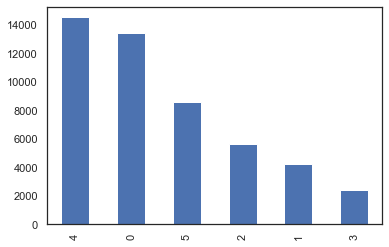

In [42]:
df1['Cluster'].value_counts().plot(kind='bar')
plt.show()

### I will have to Clean up outliers since once the model is fitted even with tuning, the R square is poor (around 0.1 R squared). Most of the features are significantly skewed

In [43]:
df1.median()

Cluster                           3.000000e+00
id                                1.967728e+07
host_id                           3.079382e+07
latitude                          4.072307e+01
longitude                        -7.395568e+01
price                             1.060000e+02
minimum_nights                    3.000000e+00
number_of_reviews                 5.000000e+00
last_review                       0.000000e+00
reviews_per_month                 3.700000e-01
calculated_host_listings_count    1.000000e+00
availability_365                  4.500000e+01
dtype: float64

In [44]:
df1.describe()

,Cluster,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,2.534390,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,0.205583,1.090910,7.143982,112.781327
std,1.929368,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,0.404131,1.597283,32.952519,131.622289
min,0.000000,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.000000,0.040000,1.000000,0.000000
50%,3.000000,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.000000,0.370000,1.000000,45.000000
75%,4.000000,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,0.000000,1.580000,2.000000,227.000000
max,5.000000,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,1.000000,58.500000,327.000000,365.000000


#### EDA step 2 Outliers removal

In [45]:
df1 = df1[df1.price < df1.price.quantile(.98)]

In [46]:
df1.head()

,Cluster,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0,0.21,6,365
1,0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0,0.38,2,355
2,1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,0.00,1,365
3,4,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,0,4.64,1,194
4,5,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0,0.10,1,0


In [47]:
df1.describe()

,Cluster,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,47909.000000,4.790900e+04,4.790900e+04,47909.000000,47909.000000,47909.000000,47909.000000,47909.000000,47909.000000,47909.000000,47909.000000,47909.000000
mean,2.557140,1.898457e+07,6.720486e+07,40.728814,-73.951690,132.009560,6.982634,23.536768,0.201319,1.100361,7.106744,111.327579
std,1.921591,1.096439e+07,7.830655e+07,0.054760,0.046238,89.079968,20.377277,44.801109,0.400990,1.604451,32.903172,131.010142
min,0.000000,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,9.462694e+06,7.777033e+06,40.689840,-73.982690,68.000000,1.000000,1.000000,0.000000,0.040000,1.000000,0.000000
50%,3.000000,1.962520e+07,3.061305e+07,40.722640,-73.955230,101.000000,2.000000,5.000000,0.000000,0.380000,1.000000,43.000000
75%,4.000000,2.907929e+07,1.072968e+08,40.763240,-73.935610,174.000000,5.000000,24.000000,0.000000,1.610000,2.000000,221.000000
max,5.000000,3.648724e+07,2.743213e+08,40.913060,-73.712990,549.000000,1250.000000,629.000000,1.000000,58.500000,327.000000,365.000000


#### EDA step 3 : give a numerical significance to the date of the last review

In [ ]:
import datetime as dt

In [ ]:
lastDate = dt.datetime(2019,7, 8)



In [ ]:
df1['Last_review'] =  pd.to_datetime(df1['last_review'])

In [ ]:
df1['diff_weeks'] = lastDate - df1['Last_review']
df1['diff_weeks']=df1['diff_weeks']/np.timedelta64(1,'W')

#### How many weeks passed since the last review?

In [ ]:
plt.figure(figsize=(15,5))

plt.hist(df1['diff_weeks'], 200, facecolor='g', alpha=0.75)
plt.show()

The big last number is for the conversion to time with the places with no reviews.
I will substitute that with the maximum number of weeks passed by in the dataset from the last review. In order to reduce the skewness, as done earlier, I will leave cut off the date diff variable up to 3 std from the median (100 weeks). That value will be assigned to the places with no reviews as well.

In [48]:
df1.drop(['id','name', 'host_id', 'host_name', 'neighbourhood_group', 'latitude','longitude', 'neighbourhood'],axis =1, inplace=True)

In [49]:
df1.head()

,Cluster,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2,Private room,149,1,9,0,0.21,6,365
1,0,Entire home/apt,225,1,45,0,0.38,2,355
2,1,Private room,150,3,0,1,0.00,1,365
3,4,Entire home/apt,89,1,270,0,4.64,1,194
4,5,Entire home/apt,80,10,9,0,0.10,1,0


In [ ]:
#df1.loc[df1['diff_weeks'] == 2583.571429, 'diff_weeks'] = 171


#df1.loc[(df1.diff_weeks == 2583.571429),'diff_weeks']= 171


#df1['diff_weeks'] = df1.apply(lambda x: x == 171 if x == 2583.571429 else x, axis=1)

#df1.where((df1['diff_weeks'] == 2583.571429 , 171), inplace=True)

#z['c'] = z.apply(lambda x: math.log(x.b) if x.b > 0 else 0, axis=1)

df1['diff_weeks'].mask(df1['diff_weeks'] == df1['diff_weeks'].max() , 100, inplace=True)

In [ ]:
df1.describe()

#### EDA step 4 form a review score given by multiplying the number of reservation with reviews per month, since the two are correlated in a positive way

In [50]:
df1['review_score'] = df1['number_of_reviews'] * df1['reviews_per_month']

#### How are the numerical column correlated with the response variable  ?

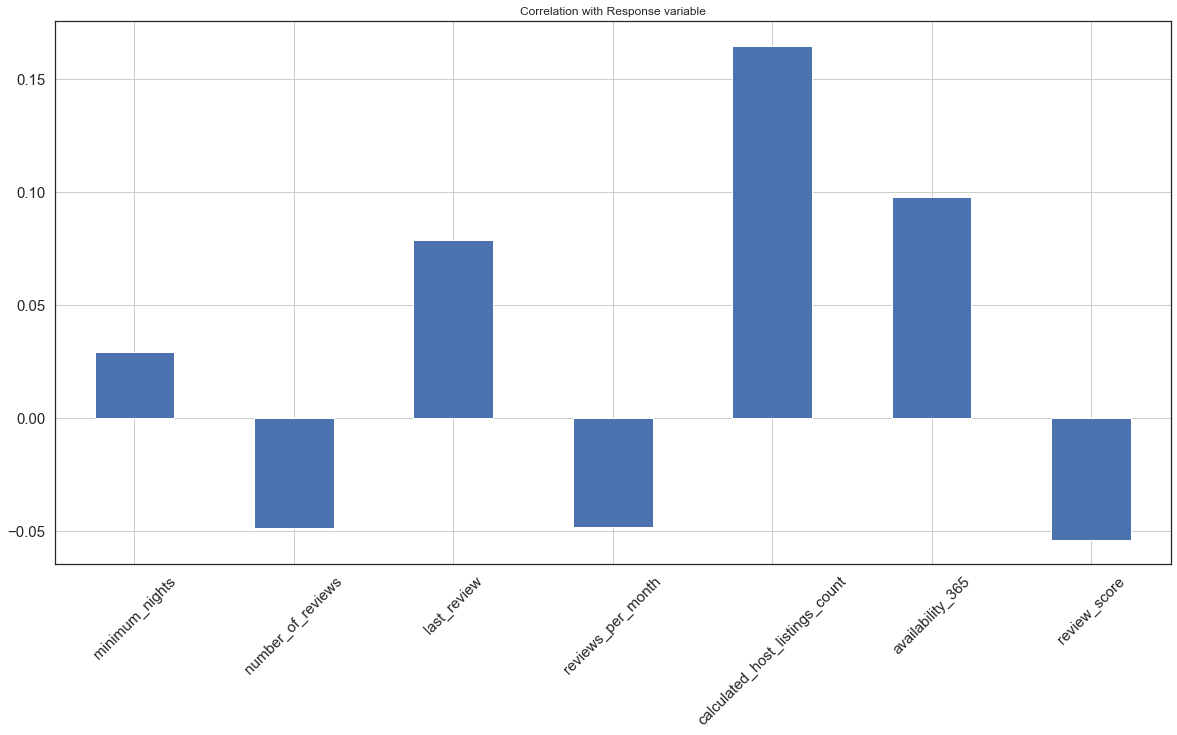

In [51]:
df1.drop(columns = ['price','Cluster']
    ).corrwith(df1.price).plot.bar(figsize=(20,10),
              title = 'Correlation with Response variable',
              fontsize = 15, rot = 45,
              grid = True)


#### How does the correlation plot changes after the EDA??

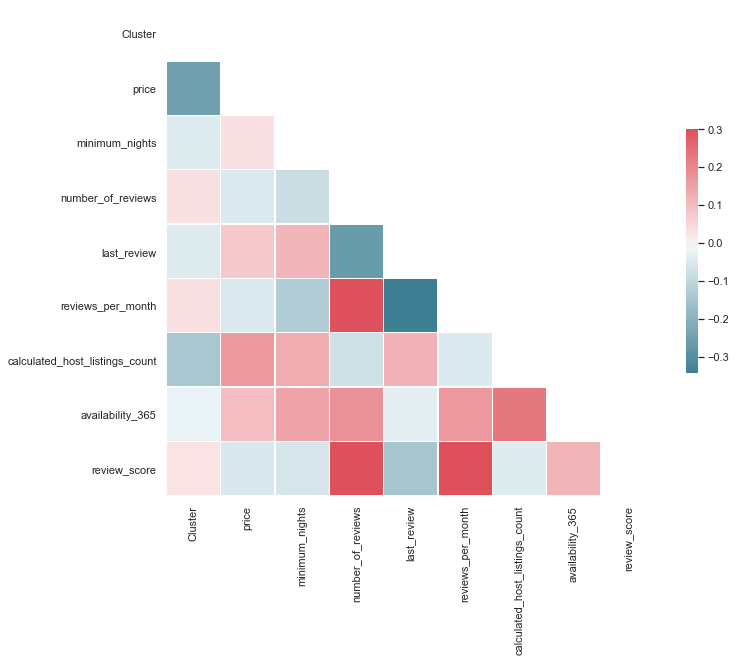

In [52]:
from string import ascii_letters


sns.set(style="white")

# Compute the correlation matrix
corr = df1.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [53]:
df1.head(2)

,Cluster,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,review_score
0,2,Private room,149,1,9,0,0.21,6,365,1.89
1,0,Entire home/apt,225,1,45,0,0.38,2,355,17.10


In [54]:
df1.drop(['number_of_reviews', 'reviews_per_month'],axis =1, inplace=True)

## Now it is time to do the data preprocessing ( label encoder, standard scaler, train and test)

In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# # Looping for each object type column
#Using label encoder to convert into numeric types
for col in df1:
    if df1[col].dtypes=='object':
        df1[col]=le.fit_transform(df1[col])

In [56]:
df1.median()

Cluster                             3.00
room_type                           0.00
price                             101.00
minimum_nights                      2.00
last_review                         0.00
calculated_host_listings_count      1.00
availability_365                   43.00
review_score                        2.16
dtype: float64

In [ ]:
#df1.drop(df1.loc[df1['reviews_per_month']> (3* 2*4)].index, inplace=True)
df1.drop(df1.loc[df1['review_score']> ( 100)].index, inplace=True)

In [ ]:
df1.describe()

In [ ]:
df1.drop(df1.loc[df1['diff_weeks']> (101)].index, inplace=True)

In [ ]:
df1.describe()

In [57]:
from sklearn.preprocessing import OneHotEncoder 
  
# creating one hot encoder object by default 
# entire data passed is one hot encoded 

pt_dummies = pd.get_dummies(df1.room_type)
dff1 = pd.concat([pt_dummies,df1 ], axis=1)

In [58]:
dff1.head(2)

,0,1,2,Cluster,room_type,price,minimum_nights,last_review,calculated_host_listings_count,availability_365,review_score
0,0,1,0,2,1,149,1,0,6,365,1.89
1,1,0,0,0,0,225,1,0,2,355,17.10


In [59]:
#to avoid the dummy variable tap

dff1.drop(2,axis =1, inplace=True)

In [60]:
dff1['Privater'] =dff1[1]

In [61]:
dff1['Entireapt'] =dff1[0]

In [62]:
dff1.head()

,0,1,Cluster,room_type,price,minimum_nights,last_review,calculated_host_listings_count,availability_365,review_score,Privater,Entireapt
0,0,1,2,1,149,1,0,6,365,1.89,1,0
1,1,0,0,0,225,1,0,2,355,17.10,0,1
2,0,1,1,1,150,3,1,1,365,0.00,1,0
3,1,0,4,0,89,1,0,1,194,1252.80,0,1
4,1,0,5,0,80,10,0,1,0,0.90,0,1


In [63]:
dff1.drop([0,1],axis =1, inplace=True)

In [64]:
dff1.head()

,Cluster,room_type,price,minimum_nights,last_review,calculated_host_listings_count,availability_365,review_score,Privater,Entireapt
0,2,1,149,1,0,6,365,1.89,1,0
1,0,0,225,1,0,2,355,17.10,0,1
2,1,1,150,3,1,1,365,0.00,1,0
3,4,0,89,1,0,1,194,1252.80,0,1
4,5,0,80,10,0,1,0,0.90,0,1


In [65]:
from sklearn.preprocessing import OneHotEncoder 
  
# creating one hot encoder object by default 
# entire data passed is one hot encoded 

pt_dummies = pd.get_dummies(df1.Cluster)
dff1 = pd.concat([pt_dummies,dff1 ], axis=1)

In [66]:
dff1.head(2)

,0,1,2,3,4,5,Cluster,room_type,price,minimum_nights,last_review,calculated_host_listings_count,availability_365,review_score,Privater,Entireapt
0,0,0,1,0,0,0,2,1,149,1,0,6,365,1.89,1,0
1,1,0,0,0,0,0,0,0,225,1,0,2,355,17.10,0,1


In [67]:
#to avoid the dummy variable tap

dff1.drop(3,axis =1, inplace=True)

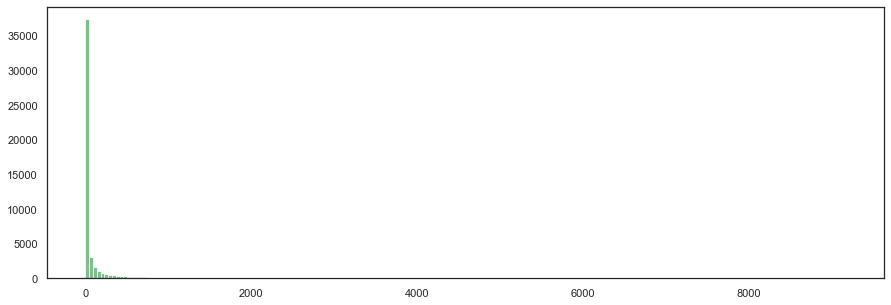

In [68]:
plt.figure(figsize=(15,5))

plt.hist(df1['review_score'], 200, facecolor='g', alpha=0.75)
plt.show()

In [69]:
y= dff1['price'].values

In [70]:
dff2 = dff1.drop(['price','room_type', 'Cluster'],axis =1)

In [71]:
# next steps : Label encoder, dummies for column of type of place
# use 3 different algorithms : random forest, regular regression, xgboost

In [72]:
dff2.head()

,0,1,2,4,5,minimum_nights,last_review,calculated_host_listings_count,availability_365,review_score,Privater,Entireapt
0,0,0,1,0,0,1,0,6,365,1.89,1,0
1,1,0,0,0,0,1,0,2,355,17.10,0,1
2,0,1,0,0,0,3,1,1,365,0.00,1,0
3,0,0,0,1,0,1,0,1,194,1252.80,0,1
4,0,0,0,0,1,10,0,1,0,0.90,0,1


In [73]:
dff2.describe()

,0,1,2,4,5,minimum_nights,last_review,calculated_host_listings_count,availability_365,review_score,Privater,Entireapt
count,47909.000000,47909.000000,47909.000000,47909.000000,47909.000000,47909.000000,47909.000000,47909.000000,47909.000000,47909.000000,47909.000000,47909.000000
mean,0.268300,0.087854,0.115991,0.301029,0.176355,6.982634,0.201319,7.106744,111.327579,68.266927,0.463107,0.512847
std,0.443079,0.283085,0.320217,0.458710,0.381126,20.377277,0.400990,32.903172,131.010142,235.539981,0.498642,0.499840
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.050000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,43.000000,2.160000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,1.000000,0.000000,5.000000,0.000000,2.000000,221.000000,33.660000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1250.000000,1.000000,327.000000,365.000000,9170.820000,1.000000,1.000000


In [74]:
#from sklearn.preprocessing import StandardScaler


#Feature Scaling
from sklearn.preprocessing import StandardScaler

X = dff2
sc_x=StandardScaler()
X=sc_x.fit_transform(X)

In [75]:
X

array([[-0.60554185, -0.31034785,  2.76068442, ..., -0.28181041,
         1.07672073, -1.0260333 ],
       [ 1.65141353, -0.31034785, -0.36222902, ..., -0.21723472,
        -0.92874593,  0.97462724],
       [-0.60554185,  3.22219082, -0.36222902, ..., -0.28983461,
         1.07672073, -1.0260333 ],
       ...,
       [-0.60554185,  3.22219082, -0.36222902, ..., -0.28983461,
        -0.92874593,  0.97462724],
       [ 1.65141353, -0.31034785, -0.36222902, ..., -0.28983461,
        -0.92874593, -1.0260333 ],
       [ 1.65141353, -0.31034785, -0.36222902, ..., -0.28983461,
         1.07672073, -1.0260333 ]])

## Modeling, evaluation and grid seach 

In [76]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### First model : multiple linear regression

In [77]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [78]:
y_predLR =lm.predict(X_test)

In [79]:
import statsmodels.api as sm
est = sm.OLS(y_train,X_train).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.132
Model:                            OLS   Adj. R-squared (uncentered):              0.132
Method:                 Least Squares   F-statistic:                              487.6
Date:                Sun, 02 Aug 2020   Prob (F-statistic):                        0.00
Time:                        13:30:47   Log-Likelihood:                     -2.4607e+05
No. Observations:               38327   AIC:                                  4.922e+05
Df Residuals:                   38315   BIC:                                  4.923e+05
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            31.3831      1.669     18.806      0.000      28.112      34.654
x2             1.3212      1.206      1.095      0.273      -1.043       3.685
x3             3.3990      1.310      2.596      0.009       0.832       5.966
x4             6.4816      1.692      3.831      0.000       3.165       9.798
x5            11.0567      1.476      7.490      0.000       8.163      13.950
x6            -5.4076      0.796     -6.790      0.000      -6.969      -3.847
x7             6.5217      0.778      8.383      0.000       4.997       8.047
x8             1.2306      0.828      1.486      0.137      -0.392       2.853
x9            11.1960      0.801     13.974      0.000       9.626      12.766
x10           -2.7907      0.761     -3.668      0.000      -4.282      -1.300
x11           15.1464      2.550      5.940      0.000      10.148      20.145
x12           59.9490      2.554     23.469      0.000      54.942      64.956
==============================================================================
Omnibus:                    14763.039   Durbin-Watson:                   0.417
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            69842.268
Skew:                           1.839   Prob(JB):                         0.00
Kurtosis:                       8.497   Cond. No.                         6.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_predLR))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_predLR))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_predLR)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,y_predLR))
print('R squared', metrics.r2_score(y_test,y_predLR))

Mean Absolute Error:  46.226660368313745
Mean Squared Error:  4575.5057939009685
Root Mean Squared Error:  67.64248512511178
Explained Variance Score:  0.4185014119746032
R squared 0.41844756118195514


### Second model : random forest

In [81]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [82]:
y_predRF=rf.predict(X_test)


In [83]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_predRF))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_predRF))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_predRF)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,y_predRF))
print('R squared', metrics.r2_score(y_test,y_predRF))

Mean Absolute Error:  45.05660009716069
Mean Squared Error:  4557.611321705521
Root Mean Squared Error:  67.51008311138064
Explained Variance Score:  0.4209675177504737
R squared 0.42072197070417583


In [84]:
#Grid Search
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': range(1,10,2),
    'min_samples_leaf': [20,30,50, 70,80,100],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [50,70,100,150]
}

# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = 4, verbose = 2,scoring='neg_mean_absolute_error')
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

grid_search.best_params_,grid_search.best_score_

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    5.6s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   26.3s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  1.0min
[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  1.8min
[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed:  3.8min
[Parallel(n_jobs=4)]: Done 1450 tasks      | elapsed:  6.7min
[Parallel(n_jobs=4)]: Done 1977 tasks      | elapsed: 11.4min
[Parallel(n_jobs=4)]: Done 2584 tasks      | elapsed: 17.9min
[Parallel(n_jobs=4)]: Done 3273 tasks      | elapsed: 26.6min
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed: 32.3min
[Parallel(n_jobs=4)]: Done 4893 tasks      | elapsed: 38.0min
[Parallel(n_jobs=4)]: Done 5824 tasks      | elapsed: 49.4min
[Parallel(n_jobs=4)]: Done 6837 tasks      | elapsed: 69.2min
[Parallel(n_jobs=4)]: Done 7200 out of 7200 | elapsed: 76.4min finished


({'bootstrap': True,
  'max_depth': 9,
  'min_samples_leaf': 20,
  'min_samples_split': 8,
  'n_estimators': 150},
 -43.469970693191655)

In [86]:
RF_model =RandomForestRegressor(bootstrap= True,
 max_depth= 9,
 min_samples_leaf= 20,
 min_samples_split= 8,
 n_estimators= 150)
RF_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=9, min_samples_leaf=20, min_samples_split=8,
                      n_estimators=150)

In [87]:
y_predRFC = RF_model.predict(X_test)

In [88]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_predRFC))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_predRFC))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_predRFC)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,y_predRFC))
print('R squared', metrics.r2_score(y_test,y_predRFC))

Mean Absolute Error:  43.568859078251805
Mean Squared Error:  4206.431313730642
Root Mean Squared Error:  64.85700666643999
Explained Variance Score:  0.4653659299194064
R squared 0.4653573835527759


#### What is the feature importance? 

Feature ranking:
1. feature 11 (0.636114)
2. feature 0 (0.156300)
3. feature 8 (0.061685)
4. feature 9 (0.047076)
5. feature 5 (0.042639)
6. feature 7 (0.029769)
7. feature 4 (0.012215)
8. feature 6 (0.004380)
9. feature 10 (0.003817)
10. feature 1 (0.003162)
11. feature 3 (0.002224)
12. feature 2 (0.000620)


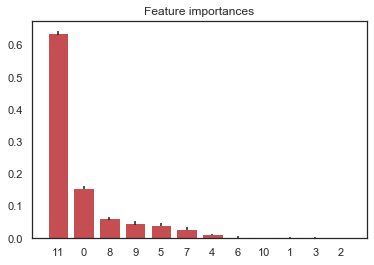

In [89]:
importances = RF_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

### Use PCA to reduce dimensionality

In [90]:
from sklearn.decomposition import PCA
pca_cc = PCA(n_components=5)
principalComponents_cc = pca_cc.fit_transform(X)

In [91]:
principal_cc_Df = pd.DataFrame(data = principalComponents_cc
             , columns = ['principal component 1', 'principal component 2','principal component 3' , 'principal component 4','principal component 5'])

In [92]:
print('Explained variation per principal component: {}'.format(pca_cc.explained_variance_ratio_))

Explained variation per principal component: [0.1816935  0.11979438 0.10823938 0.10065692 0.09968385]


### Third model : XGboost

In [93]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X,label=y)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', seed=42)
xg_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=42,
             subsample=1, tree_method=None, validate_parameters=False,
             verbosity=None)

In [94]:
y_predXG = xg_reg.predict(X_test)

In [95]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_predXG))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_predRF))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_predXG)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,y_predXG))
print('R squared', metrics.r2_score(y_test,y_predRF))

Mean Absolute Error:  43.75077025849544
Mean Squared Error:  4557.611321705521
Root Mean Squared Error:  64.91151476050264
Explained Variance Score:  0.46447734360812043
R squared 0.42072197070417583


In [96]:
from sklearn.model_selection import GridSearchCV
  
#Tune max_depth and min_child_weight
param_test1 = {
 'max_depth':range(2,4,1),
 'min_child_weight':range(3,6,1)
}
gsearch1 = GridSearchCV(estimator = xg_reg,
                        param_grid = param_test1, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4,iid=False, cv=10)
gsearch1.fit(X_train,y_train)
gsearch1.best_params_, gsearch1.best_score_

C:\Users\Lucia Casucci\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'max_depth': 3, 'min_child_weight': 5}, -43.38981605466605)

In [97]:
#tune gamma
param_test2 = {
 'gamma':[i/10.0 for i in range(0,10)]
}
gsearch2 = GridSearchCV(estimator = xg_reg,
                        param_grid = param_test2, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4,iid=False, cv=10)

gsearch2.fit(X_train,y_train)
gsearch2.best_params_, gsearch2.best_score_

({'gamma': 0.7}, -43.5629826513964)

In [98]:
#Tune subsample and colsample_bytree
param_test3 = {
 'subsample':[i/100.0 for i in range(75,100,5)],
 'colsample_bytree':[i/100.0 for i in range(75,100,5)]
}

gsearch3 = GridSearchCV(estimator = xg_reg,
                        param_grid = param_test3, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4,iid=False, cv=10)
gsearch3.fit(X_train,y_train)
gsearch3.best_params_, gsearch3.best_score_


({'colsample_bytree': 0.85, 'subsample': 0.95}, -43.70897685843647)

In [100]:

# Tuning Regularization Parameters
param_test4 = {
 'reg_alpha':[0.011,0.012,0.013,0.014,0.015,0.016,0.017,0.018,0.019,0.02,0.021,0.022,0.023,0.24,0.025,0.026]
}
gsearch4 = GridSearchCV(estimator = xg_reg,
                        param_grid = param_test4, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4,iid=False, cv=10)
gsearch4.fit(X_train,y_train)
gsearch4.best_params_, gsearch4.best_score_

({'reg_alpha': 0.016}, -43.56523399346618)

In [101]:
# Tuning No. of trees
param_test5 = {
 'n_estimators':range(30,50,1)
}
gsearch5 = GridSearchCV(estimator = xg_reg,
                        param_grid = param_test5, 
                        scoring='neg_mean_absolute_error',
                        n_jobs=4,iid=False, cv=10)
gsearch5.fit(X_train,y_train)
gsearch5.best_params_, gsearch5.best_score_

({'n_estimators': 31}, -43.10778418362178)

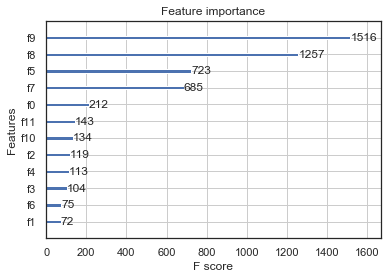

In [102]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [103]:
import xgboost as xgb
data_dmatrix = xgb.DMatrix(data=X,label=y)
xg_reg2 = xgb.XGBRegressor(objective ='reg:squarederror', 
                          learning_rate =0.1,
                          n_estimators=31,
                          max_depth=3,
                          min_child_weight=5,
                          gamma=0.7,
                          subsample=0.95,
                          colsample_bytree=0.85,
                          nthread=4,
                          scale_pos_weight=1,
                          reg_alpha=0.016,
                          seed=42,
                          )
xg_reg2.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.85, gamma=0.7, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=0, max_depth=3,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             n_estimators=31, n_jobs=4, nthread=4, num_parallel_tree=1,
             random_state=42, reg_alpha=0.016, reg_lambda=1, scale_pos_weight=1,
             seed=42, subsample=0.95, tree_method=None,
             validate_parameters=False, verbosity=None)

In [104]:
y_predXG2 = xg_reg2.predict(X_test)

In [105]:
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_predXG2))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_predXG2))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_predXG2)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,y_predXG2))
print('R squared', metrics.r2_score(y_test,y_predRF))

Mean Absolute Error:  44.25501522851672
Mean Squared Error:  4511.041578327693
Root Mean Squared Error:  67.16428796859007
Explained Variance Score:  0.42900841088156927
R squared 0.42072197070417583


### Using ANN

In [106]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding


Using TensorFlow backend.


In [107]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 100, init = 'uniform', activation = 'relu', input_dim = 12))

classifier.add(Dropout(0.25))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 100, init = 'uniform', activation = 'relu'))

classifier.add(Dropout(0.25))

classifier.add(Dense(output_dim = 100, init = 'uniform', activation = 'relu'))

classifier.add(Dropout(0.25))

classifier.add(Dense(output_dim = 100, init = 'uniform', activation = 'relu'))

classifier.add(Dropout(0.25))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 100, init = 'uniform', activation = 'relu'))

classifier.add(Dropout(0.25))

classifier.add(Dense(output_dim = 100, init = 'uniform', activation = 'relu'))


classifier.add(Dropout(0.25))

# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'relu'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mse', 'mae', 'mape'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 100, nb_epoch = 100)

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results

C:\Users\Lucia Casucci\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=12, units=100, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Lucia Casucci\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=100, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
C:\Users\Lucia Casucci\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=100, kernel_initializer="uniform")`
C:\Users\Lucia Casucci\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=100, kernel_initializer="uniform")`
C:\Users\Lucia Casucci\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: Us

Epoch 1/100
38327/38327 [==============================] - 1s 37us/step - loss: 7028.9824 - mse: 7028.9849 - mae: 56.3201 - mape: 18569818.0000
Epoch 2/100
38327/38327 [==============================] - 1s 29us/step - loss: 5085.0500 - mse: 5085.0513 - mae: 47.6991 - mape: 23091332.0000
Epoch 3/100
38327/38327 [==============================] - 1s 31us/step - loss: 5082.3118 - mse: 5082.3130 - mae: 47.6443 - mape: 25887502.0000
Epoch 4/100
38327/38327 [==============================] - 1s 30us/step - loss: 5026.8623 - mse: 5026.8623 - mae: 47.5223 - mape: 25543054.0000
Epoch 5/100
38327/38327 [==============================] - 1s 30us/step - loss: 4975.1553 - mse: 4975.1553 - mae: 47.1402 - mape: 25118070.0000
Epoch 6/100
38327/38327 [==============================] - 1s 30us/step - loss: 4982.7124 - mse: 4982.7104 - mae: 47.1357 - mape: 26977876.0000 0s - loss: 4995.5623 - mse: 4995.5620 - mae: 47.2222 - mape: 154
Epoch 7/100
38327/38327 [==============================] - 1s 32us/step

In [108]:
y_pred = classifier.predict(X_test)

In [109]:
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,y_pred))
print('R squared', metrics.r2_score(y_test,y_pred))

Mean Absolute Error:  45.31365181284542
Mean Squared Error:  4295.92883413653
Root Mean Squared Error:  65.54333554326122
Explained Variance Score:  0.4580116670908577
R squared 0.4539821381472101
